# Reading Data from a WebPage

## Investigating how to webscrape a table in to a Panda DataFrame.


In [21]:
%matplotlib inline
import bs4 as bs
import urllib.request
import numpy as np
import pandas as pd
import html5lib

In [22]:
#Read all the HTML tables on the webpage, using the first line as a header
circulationTables =   pd.read_html('https://en.wikipedia.org/wiki/List_of_newspapers_in_the_United_Kingdom_by_circulation', 
                                   header=0) 
# we only want the first table from the webpage
df = circulationTables[0]
df.head(2)

,Title,2017[8],2016[9],2015[10],2014[11],2013[12],2012[13],2011[14],2010[15][16]
0,The Sun,"1666715 !1,666,715","1787096 !1,787,096","1978702 !1,978,702","2213659 !2,213,659","2409811 !2,409,811","2582301 !2,582,301","3001822 !3,001,822","3006565 !3,006,565"
1,Daily Mail,"1511357 !1,511,357","1589471 !1,589,471","1688727 !1,688,727","1780565 !1,780,565","1863151 !1,863,151","1945496 !1,945,496","2136568 !2,136,568","2120347 !2,120,347"


In [23]:
#we are going to use the first col ['Title'] as an Index for the Data Frame

df = (df.set_index(df['Title']))
#remove the old col
del df['Title']

df.head(2)

,2017[8],2016[9],2015[10],2014[11],2013[12],2012[13],2011[14],2010[15][16]
Title,,,,,,,,
The Sun,"1666715 !1,666,715","1787096 !1,787,096","1978702 !1,978,702","2213659 !2,213,659","2409811 !2,409,811","2582301 !2,582,301","3001822 !3,001,822","3006565 !3,006,565"
Daily Mail,"1511357 !1,511,357","1589471 !1,589,471","1688727 !1,688,727","1780565 !1,780,565","1863151 !1,863,151","1945496 !1,945,496","2136568 !2,136,568","2120347 !2,120,347"


In [24]:

#we need to clean each cell of the DataFrame
df = df.applymap(lambda x: int(x.split(' ')[0]) ) 

In [25]:
df

,2017[8],2016[9],2015[10],2014[11],2013[12],2012[13],2011[14],2010[15][16]
Title,,,,,,,,
The Sun,1666715,1787096,1978702,2213659,2409811,2582301,3001822,3006565
Daily Mail,1511357,1589471,1688727,1780565,1863151,1945496,2136568,2120347
Metro,1476956,1348033,0,1362893,0,0,0,0
Evening Standard,887253,898407,877532,805309,695645,699368,704008,601960
Daily Mirror,724888,809147,922235,992256,1058488,1102810,1194097,1218425
Daily Telegraph,472258,472033,494675,544546,555817,578774,651184,691128
The Times,451261,404155,396621,384304,399339,397549,457250,508250
Daily Star,443452,470369,425246,489067,535957,617082,734311,779376
Daily Express,392526,408700,457914,500473,529648,577543,639875,674640


In [26]:
#now we can use the data.
df.describe()

,2017[8],2016[9],2015[10],2014[11],2013[12],2012[13],2011[14],2010[15][16]
count,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01
mean,5.553253e+05,5.744384e+05,5.119962e+05,6.317315e+05,5.718721e+05,6.059263e+05,6.754293e+05,6.751836e+05
std,5.515603e+05,5.585395e+05,5.883498e+05,6.507996e+05,6.811567e+05,7.213194e+05,8.226309e+05,8.274423e+05
min,0.000000e+00,4.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.565100e+05,1.737098e+05,1.544062e+05,2.227188e+05,1.725305e+05,1.882810e+05,1.721442e+05,1.393612e+05
50%,4.179890e+05,4.064275e+05,3.384860e+05,4.366855e+05,3.466425e+05,3.570210e+05,4.201585e+05,4.492825e+05
75%,7.654792e+05,8.314620e+05,5.903892e+05,8.520458e+05,5.907740e+05,6.376535e+05,7.115838e+05,7.131900e+05
max,1.666715e+06,1.787096e+06,1.978702e+06,2.213659e+06,2.409811e+06,2.582301e+06,3.001822e+06,3.006565e+06


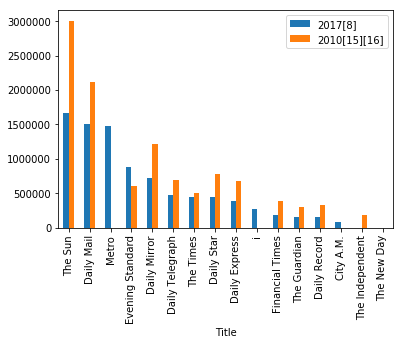

In [33]:
#Show the differnece between 2017 and 2010 circulations.
df2 = pd.DataFrame(df, columns=['2017[8]', '2010[15][16]'])
df2.plot.bar()